In [2]:
from reverting_l import *
import matplotlib.pyplot as plt 
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
import os 
import numpy as np 
from matplotlib import cm
from matplotlib import rc
rc('text', usetex=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load all of the files you want
files = []
pfiles = []
for f in os.listdir('../simulations'):
    if 'A' not in f:
        if '.npy' in f:
            if 'array' not in f:
                if 'params' not in f:
                    files.append(f)
                else: 
                    pfiles.append(f)
files = sorted(files) # the filenames of data arrays 
pfiles = sorted(pfiles) # the filenames of parameter arrays 
params = [np.load("../simulations/"+f).item() for f in pfiles]
# the list of all parameters

In [252]:
# make an array with the data nicely organized as a list of dicts
#\########################\####################################
##\# THIS TAKES FOREVER ###\###################################
###\########################\##################################
data = []
for params,file in zip(params,files):
    S = np.load("../simulations/"+file)
    n,m,t = S.T
    datdict = {}
    datdict['trial']=params['trial']
    datdict['l'] = params['l']
    datdict['var_n']=n.var()
    datdict['mean_n']=n.mean()
    datdict['var_m']=m.var()
    del S
    data.append(datdict)
data = np.array(data)
np.save('simulation-data2',data)

KeyboardInterrupt: 

In [2]:
# load the data array instead of computing it again
data = np.load('../simulation-data.npy')

In [3]:
# generate the plot colors 
keys = [d['trial'] for d in data]
keys = np.unique(keys)
keys = keys.astype('str')
colors = cm.tab10(np.linspace(0, 1, len(keys)))
colordict = {}
for k,c in zip(keys,colors):
    colordict[k]=c
colors = [colordict[k] for k in [d['trial'] for d in data]]
colors = np.array(colors)
del colordict
# now colors is the list of colors assigned to datasets in the 
# same order as data list 

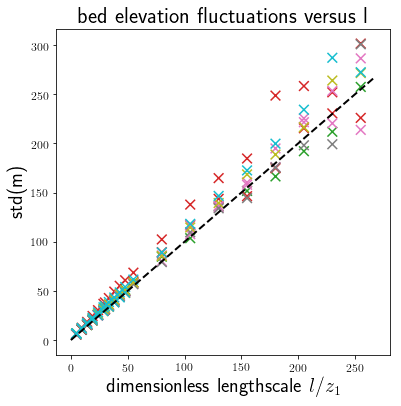

In [4]:
# first plot all of the variance of m versus l^2/z1^2
plt.figure(figsize=(6,6))

x,y = np.array([(d['l'],d['var_m']) for d in data]).T
x = x/z1
y = np.sqrt(y)
plt.scatter(x,y,c=colors,marker='x',s=95)
xx = np.linspace(0,x.max()*1.05,100)
plt.plot(xx,xx,color='black',linestyle='dashed',lw=2)
plt.ylabel('std(m)',fontsize=20)
plt.xlabel('dimensionless lengthscale $l/z_1$',fontsize=20)
plt.title('bed elevation fluctuations versus l',fontsize=22)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('../figures/var(m)-vs-l.png')

In [309]:
# now compare the limits of mean activity its variance with the equations from ancey2008 
# and compare these to the values obtained directly from the trend lines of var_n vs l and mean_n vs l 
keyga = [[p['ga'] for p in params if p['trial']==k] for k in keys]
keyla = [[p['la0'] for p in params if p['trial']==k] for k in keys]
keysi = [[p['si0'] for p in params if p['trial']==k] for k in keys]
keymu = [[p['mu0'] for p in params if p['trial']==k] for k in keys]
keynu = [[p['nu'] for p in params if p['trial']==k] for k in keys]
keyga = [k[0] for k in keyga]
keyla = [k[0] for k in keyla]
keysi = [k[0] for k in keysi]
keymu = [k[0] for k in keymu]
keynu = [k[0] for k in keynu]
         
mean_n0 = [(n+l)/(g+s-m) for n,g,l,s,m in zip(keynu,keyga, keyla, keysi, keymu)] # there's the mean... ancey2008 eqn 
var_n0 = [(n+l)*(g+s)/(g+s-m)**2 for n,g,l,s,m in zip(keynu,keyga, keyla, keysi, keymu)] #and the ancey2008 variance 

keymean_n = [[d['mean_n'] for d in data if d['trial']==k] for k in keys]
mean_n = [max(x) for x in keymean_n]
var_n = [max(x) for x in keyvar_n]

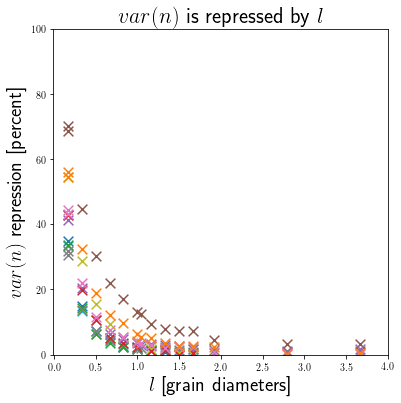

In [321]:
# now the variance of n versus l/z1
plt.figure(figsize=(6,6))

# first sort the data by key 
keyvar_n = [[d['var_n'] for d in data if d['trial']==k] for k in keys]
#keyvar_n_norm = [list(np.array(x)/xa) for x,xa in zip(keyvar_n,var_n0)]
relvar_n = [(max(x)-np.array(x))/max(x) for x in keyvar_n]

l = [[d['l'] for d in data if d['trial']==k] for k in keys]

# variance of $n$ versus l 
for x,y,col in zip(l,relvar_n,np.unique(colors,axis=0)):
    y = np.array(y)
    x = np.array(x)/(2*a)
    plt.scatter(x,100*y,marker='x',c=col,s=95)

x = np.linspace(0.02, 6,1000)
#plt.plot(x,100*(z1/(2*a))/x,color='black',lw=2,linestyle='dashed')
plt.xlabel(r'$l$ [grain diameters]',fontsize=20)
plt.ylabel(r'$var(n)$ repression [percent]',fontsize=20)
plt.ylim(-0.1,100.0)
plt.xlim(-0.01,4.0)
plt.title(r'$var(n)$ is repressed by $l$',fontsize=22)
# apparently 1-var_n(l)/var_n(inf) = z1/l 
plt.savefig('../figures/var(n)-vs-l.png')

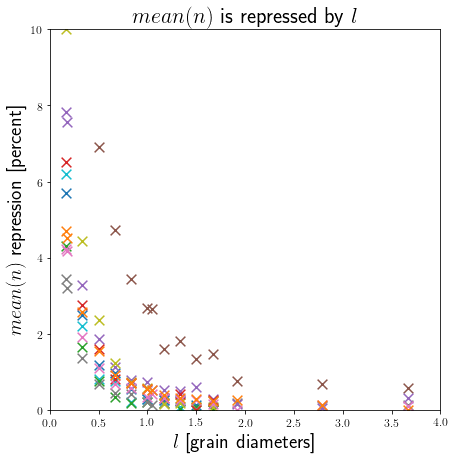

In [5]:
# now do mean bedload 
keymean_n = [[d['mean_n'] for d in data if d['trial']==k] for k in keys]
relmean_n = [(max(x)-np.array(x))/max(x) for x in keymean_n]

l = [[d['l'] for d in data if d['trial']==k] for k in keys]
plt.figure(figsize=(7,7))

for x,y,col in zip(l,relmean_n,np.unique(colors,axis=0)):
    y = np.array(y)
    x = np.array(x)/(2*a)
    y = y*100
    plt.scatter(x,y,marker='x',c=col,s=95)
    x = np.linspace(0.03, 5,1000)
#plt.plot(x,100*(z1/x)**2,'black',linestyle='dashed',lw=2)
plt.ylim(0,10)
plt.xlim(0,4)


plt.xlabel(r'$l$ [grain diameters]',fontsize=20)
plt.ylabel(r'$mean(n)$ repression [percent]',fontsize=20)
plt.title(r'$mean(n)$ is repressed by $l$',fontsize=22)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('../figures/mean(n)-vs-l.png')

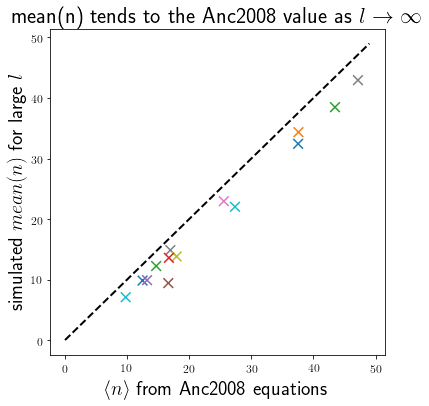

In [324]:
plt.figure(figsize=(6,6))
plt.scatter(mean_n,mean_n0,marker='x',s=95,c=np.unique(colors,axis=0)) # plotting means against one another
x = np.arange(50)
plt.plot(x,x,color='black',linestyle='dashed',lw=2)
plt.xlabel(r'$\langle n \rangle $ from Anc2008 equations',fontsize=20)
plt.ylabel(r'simulated $mean(n)$ for large $l$',fontsize=20)
plt.title(r'mean(n) tends to the Anc2008 value as $l\rightarrow \infty$',fontsize=22)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('mean(n)-tendsto2008val.png')

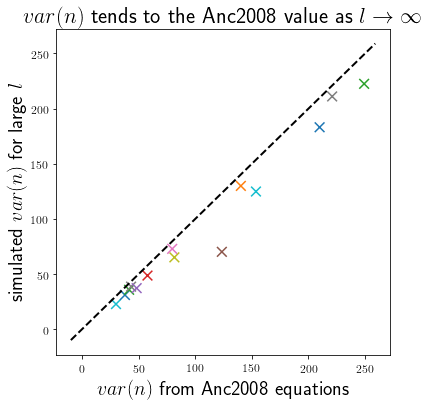

In [325]:
plt.figure(figsize=(6,6))
plt.scatter(var_n,var_n0,marker='x',s=95,c=np.unique(colors,axis=0))
x = np.arange(-10,260)
plt.plot(x,x,color='black',linestyle='dashed',lw=2)
plt.xlabel(r'$var(n)$ from Anc2008 equations',fontsize=20)
plt.ylabel(r'simulated $var(n)$ for large $l$',fontsize=20)
plt.title(r'$var(n)$ tends to the Anc2008 value as $l\rightarrow \infty$',fontsize=22)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.savefig('../figures/var(n)-tendtoAnc2008val.png')

In [304]:
# first make a dict of limits over which to plot particle activity
l1= [max(n) for n in keymean_n]
l2=[max(n) for n in keyvar_n]
trials = np.unique([p['trial'] for p in params])
xlim = [x+y for x,y in zip(l1,l2)]
xlims = {}
for k,lim in zip(trials,xlim):
    xlims[k]=lim


def plot_pdfs(filename):
    ####################################
    # process data 
    ####################################
    trial, l = filename.split('-')[:2] # get the trial and l value from the filename 
    S = np.load('../simulations/'+filename) # load in the data 
    n,m,t = np.array(S).T # separate into arrays
    M,Cm = np.unique(m,return_counts=True) # make the counts of n and m 
    N,Cn = np.unique(n,return_counts=True)
    xarg = z(M)#/z1 # z value in cm 
    #xmin = xarg.min() - (xarg.max()-xarg.min())*0.1 # set min and max values for elevation pdf 
    #xmax = xarg.max() + (xarg.max()-xarg.min())*0.1
    if float(l)<1.0:
        xmin=-3.0
        xmax=-xmin
    else:
        xmax = max(xarg)*1.05
        xmin = -xmax
    # side-by-side subplots 
    ####################################
    #fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True) # set up the figure with two 
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True) # set up the figure with two     
    # set up title and axes 
    ####################################
    title = r'parameter set $'+trial + '$ at $l='+str(l)+'$' # build the title out of the filename. Requires latex ! 
    fig.suptitle(title, fontsize=22) # make title 
    fig.set_size_inches(8,4) # set figure size 
    #####################################
    # elevation pdf
    ax1.scatter(xarg,Cm/Cm.sum()) # plot the elevation pdf 
    ax1.set_xlabel('bed elevation (cm)',fontsize=20) # label it 
    ax1.set_ylabel('PDF',fontsize=20)
    ax1.set_xlim(xmin,xmax)
    ymax = np.max(Cm/Cm.sum())*1.1
    ax1.set_ylim(-ymax/50,ymax)
    
    #####################################
    # activity pdf
    ax2.scatter(N,Cn/Cn.sum(),color='purple')
    ax2.set_xlabel('particle activity',fontsize=20) # label it 
    xlim = xlims[trial] # set the xlimit of the activity pdf based off of the std deviation of its elevation and 
    ax2.set_xlim(-3,xlim)
    ax2.set_ylim(-0.01,0.1)
    plt.tick_params(axis='both', which='minor', labelsize=14)
    
    ######################################
    # save the plot, clear it, clean memory 
    savename = '../figures/'+filename[:-4]+'.png'
    fig.savefig(savename)
    fig.clf()
    del n,m,t,M,Cm,N,Cn        


In [305]:
for f in files:
    plot_pdfs(f) # this will plot and save all paired pdfs 

/home/kp/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/kp/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

In [49]:
# RETURN TIME DIST 
# first load trial $h$ / $l=1.68$ in: 
bury_file = [f for f in files if f[0]=='h' and f.split('-')[1]==str(1.68)][0]
bury_S = np.load('../simulations/'+bury_file)

# unpack it and lose the n values
nb,mb,tb = bury_S.T
del nb

In [50]:
# resample the data every 5s 
increments = np.arange(0,int(tb.max()/5.0)*5.0,5)
indlist = tb.searchsorted(increments) # the set of indices where t is about a multiple of 5 
mb = mb[np.array(indlist)]
tb = tb[np.array(indlist)]

In [111]:
mstar = round(mb.mean())-2.0/z1 # this is -2 cm 
mstar = int(mstar) 

In [380]:
# np.roll(x,-1) brings the future element to the current position
# np.roll(x,1) brings the past element to the current position
departures, = np.where( (np.roll(mb,1) <= mstar) & (mb > mstar) )#& (np.roll(mb,-1) > mstar) ) # indices of departure from elevation mstar
returns, = np.where( (np.roll(mb,1) > mstar) & (mb <= mstar)  )#& (np.roll(mb,-1) <= mstar) )  # indices of return to elevation mstar
# must start from a departure 
while returns.min()<departures.min():
    returns = returns[1:]
# must end at a return 
while returns.max()<departures.max():
    departures = departures[:-1]
    
returntimes = tb[returns] - tb[departures] # compute the return times

In [381]:
counts,bins = np.histogram(returntimes,bins=15)
bins = np.convolve(bins, np.ones((2,))/2, mode='valid')

/home/kp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/kp/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


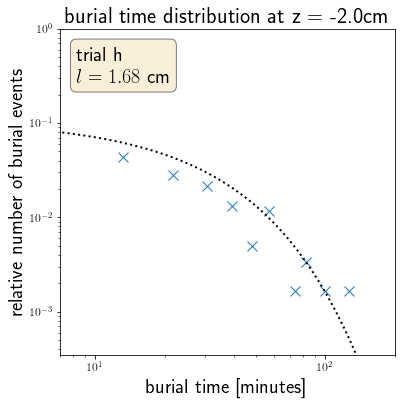

In [444]:
# fit an exponential to it 

x = bins/60
y = counts/counts.sum()
#x = x[1:]
#y = y[1:]

# fit an exponential 
logy = np.log(y)
x1 = x[~np.isinf(logy)]
logy = logy[~np.isinf(logy)]
b, loga = np.polyfit(x1,logy,1)
f = lambda x: np.exp(loga)*np.exp(b*x)
xx = np.linspace(x.min()-10,x.max()+10,100)

plt.figure(figsize=(6,6))
plt.loglog(x,y,'x',markersize=10,linewidth=2)
plt.loglog(xx,f(xx),100,linestyle='dotted',lw=2,color='black')
plt.xlim(7e0,2e2)
plt.ylim(-0.01,1e0)

plt.xlabel('burial time [minutes]',fontsize=20)
plt.ylabel('relative number of burial events',fontsize=20)
plt.title(r'burial time distribution at z = -2.0cm',fontsize=22)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

# add text box 

textstr = '\n'.join((
    r'trial %s' % ('h ', ),
    r'$l=%.2f$ cm' % (1.68, )
                    ))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.savefig('../figures/exponential-burial.png')

In [455]:
pwd

'/home/kp/Desktop/reverting-onecell/code'

In [459]:
script

'./burial-analysis.py k-2.2-200000-D.npy -0.5'

In [464]:
buryfiles = [f for f in files if 1.0<float(f.split('-')[1]) < 2.7]
for f in buryfiles: 
    for z in [-2.5, -2.0, -1.5, -1.0, -0.5]:
        script = './burial-analysis.py {} {} | bash -'.format(f,z)
        os.system(script);

In [472]:
np.savetxt('../burial-times/buryfiles',buryfiles,fmt="%s") # export a text document with all the files you'd like to analyze for burial 

In [509]:
buryfiles = [f for f in os.listdir('../burial-times/') if f.endswith('.npy')] # get the files you'd like to analyze
for file in buryfiles:
    returntimes = np.load('../burial-times/'+file) # load up the return times you made for this trial 
    trial = file.split('_')[1] # extract trial 
    l = file.split('_')[3] # extract l value
    z = file.split('_')[-1][:-4] # extract burial depth 
    #print(trial,l,z)
    
    # fit an exponential to it 
    counts,bins = np.histogram(returntimes,bins=21)
    bins = np.convolve(bins, np.ones((2,))/2, mode='valid')
    x = bins/60
    y = counts/counts.sum()
    x = x[1:]
    y = y[1:]

    # fit an exponential 
    logy = np.log(y)
    x1 = x[~np.isinf(logy)]
    logy = logy[~np.isinf(logy)]
    b, loga = np.polyfit(x1,logy,1)
    f = lambda x: np.exp(loga)*np.exp(b*x)
    xx = np.linspace(1e-8,245,100)
    yy = f(xx)
    
    plt.figure(figsize=(6,6))
    
    plt.semilogy(x,y,'x',markersize=10,linewidth=2)
    plt.semilogy(xx,yy,linestyle='dashed',linewidth=2,color='black')

    plt.xlim(1.0,240)
    plt.ylim(1e-3,1)
    
    plt.xlabel('burial time [minutes]',fontsize=20)
    plt.ylabel('relative number of burial events',fontsize=20)
    plt.title(r'burial time distribution at z = %0.2fcm'%float(z),fontsize=22)
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

    # add text box 

    textstr = '\n'.join((
        r'trial %s' % (trial, ),
        r'$l=%.2f$ cm' % (float(l), )
                        ))
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
            verticalalignment='top', bbox=props)

    plt.savefig('../figures/'+file[:-4]+'-image.png')
    plt.clf()

/home/kp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/kp/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>